## Practical Work 3

For this practical work, the trainees will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

##### Please notice that we will apply these algorithm to single variable LR.
##### Only batch variant is required.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X = np.linspace(0,20)

X = X.reshape((50,1))
X.shape

(50, 1)

In [3]:
a=-1
b=2
y=a*X+b
y

array([[  2.        ],
       [  1.59183673],
       [  1.18367347],
       [  0.7755102 ],
       [  0.36734694],
       [ -0.04081633],
       [ -0.44897959],
       [ -0.85714286],
       [ -1.26530612],
       [ -1.67346939],
       [ -2.08163265],
       [ -2.48979592],
       [ -2.89795918],
       [ -3.30612245],
       [ -3.71428571],
       [ -4.12244898],
       [ -4.53061224],
       [ -4.93877551],
       [ -5.34693878],
       [ -5.75510204],
       [ -6.16326531],
       [ -6.57142857],
       [ -6.97959184],
       [ -7.3877551 ],
       [ -7.79591837],
       [ -8.20408163],
       [ -8.6122449 ],
       [ -9.02040816],
       [ -9.42857143],
       [ -9.83673469],
       [-10.24489796],
       [-10.65306122],
       [-11.06122449],
       [-11.46938776],
       [-11.87755102],
       [-12.28571429],
       [-12.69387755],
       [-13.10204082],
       [-13.51020408],
       [-13.91836735],
       [-14.32653061],
       [-14.73469388],
       [-15.14285714],
       [-15

### Plot X vs. y

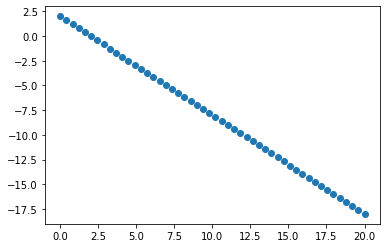

In [4]:
plt.scatter(X,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Choose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)

In [5]:
def predict(theta0,theta1,X):
    h=theta0+theta1*X
    return h

def calc_error(h , y):
    m = len(y)
    error = (h - y)
    j = (error.T@error) /(2*m)
    return (error , j)

def calc_d_theta(h , y ,X , m):
    d_theta0 =np.sum(h - y) /m
    d_theta1 = np.sum((h-y)*X) / m
    g_vec =np.array([[d_theta0 ] , [d_theta1]])
    return(d_theta0 , d_theta1, g_vec)

def updatae_theta(theta0 ,d_theta0 , theta1,d_theta1 , a ):
    theta_0_new = theta0 - a*d_theta0
    theta_1_new = theta1 - a*d_theta1
    return (theta_0_new,theta_1_new )

def updatae_theta_momentum(theta0 ,v_t_0 , theta1,v_t_1):
    theta_0_new = theta0 - v_t_0
    theta_1_new = theta1 - v_t_1
    return (theta_0_new,theta_1_new )

In [6]:
def GD_func(X , y , a ,iterations):
    theta_0_new1 = 0 
    theta_1_new1=0
    m =len(X)
    costs_hestory=[]
    thetas0 =[]
    thetas1 =[]
    hs = []
    thetas0.append(theta_0_new1)
    thetas1.append(theta_1_new1)
    for i in range(iterations):
        print(f' #################   In the iteration {i} #############################################################')
        h = predict( theta_0_new1 ,theta_1_new1 , X )
        error1 , j1 = calc_error(h , y)
        print(j1)
        costs_hestory.append(j1[0][0])
        if i !=0:
            if abs(costs_hestory[i] -costs_hestory[i-1]) <=0.001:
                break
        print('Error Vec  \n'+str(error1)+'\n')
        print('j = '+str(j1))
        print()
        d_theta01 , d_theta11 , e_vec=calc_d_theta(h=h , m=m , X=X ,y=y)
        grad_norm = np.linalg.norm(e_vec)
        print('d_theta0 : '+str(d_theta01))
        print('d_theta1 : '+str(d_theta11))
        print('the gradient vec is' +str(e_vec))
        print('the gradient vec norm is' +str(grad_norm))
        if grad_norm<0.001:
            break            
        theta_0_new1 , theta_1_new1 = updatae_theta(theta_0_new1 ,d_theta01, theta_1_new1,d_theta11, a )
        thetas0.append(theta_0_new1)
        thetas1.append(theta_1_new1)
        hs.append(h)

        print('theta_0_new : '+str(theta_0_new1))
        print('theta_1_new : '+str(theta_1_new1))
    print('#################################################################################')
    print('theta0 optemal '+str(theta_0_new1))
    print('theta1 optemal '+str(theta_0_new1))
    
    return (theta_0_new1 , theta_1_new1 , costs_hestory , thetas0 , thetas1 , hs)
    
    
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = GD_func(X,y ,0.0005 , 300 )
h = predict(theta0 , theta1 ,X)
print('the actual data'+str(y))
print('the predicted '+str(h))

 #################   In the iteration 0 #############################################################
[[49.34693878]]
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

d_theta0 : 8.0
d_theta1 : 114.69387755102042
the gradient vec is[[  8.        ]
 [114.69387755]]


In [7]:
from sklearn.metrics import r2_score
r2_score(y,h)

0.9686158031920962

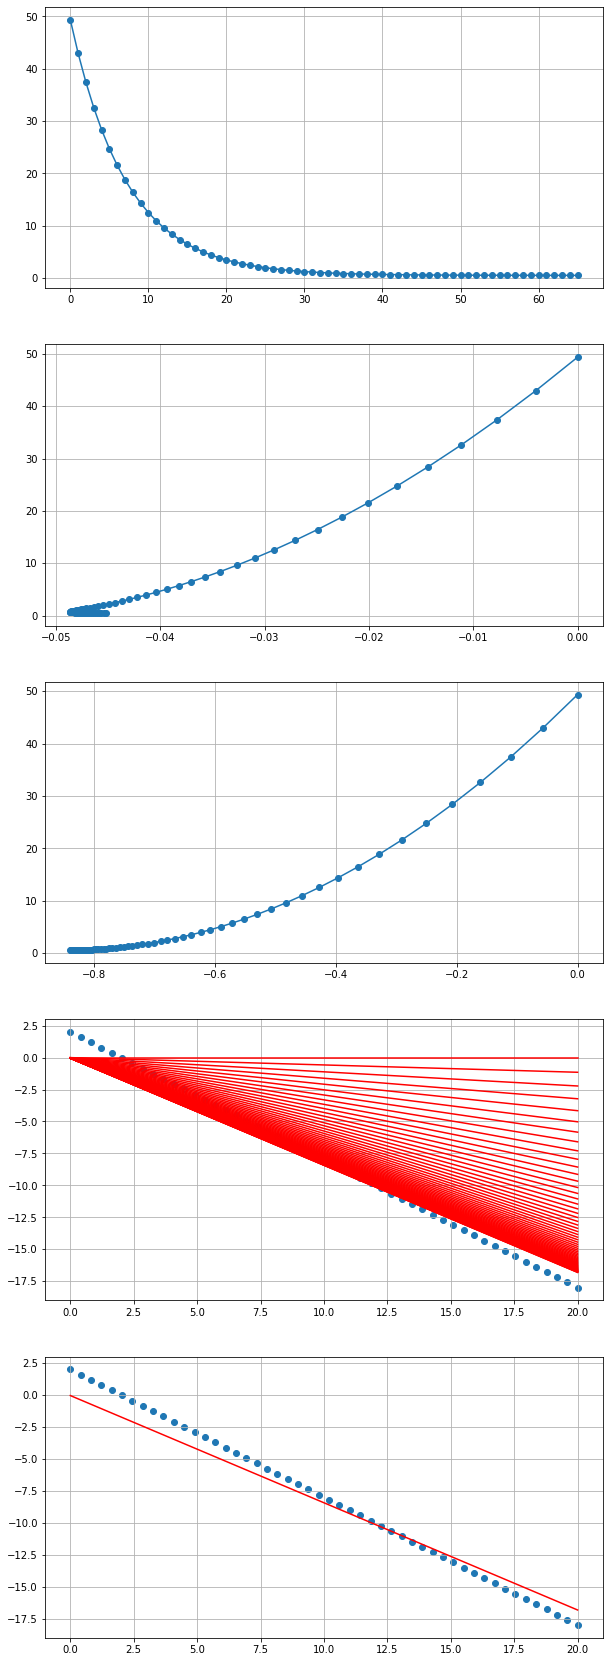

In [8]:
def plot_1(x , y , thetas0 , thetas1, costs,hs , h  ):
    fig, axs = plt.subplots(5, figsize=(10,30))
    for i in range(5):
        axs[i].grid()
    
    axs[0].plot(costs, marker = 'o')
    axs[1].plot(thetas0,costs_hestory , marker = 'o')
    axs[2].plot(thetas1,costs_hestory , marker = 'o')
    axs[3].scatter(X, y )
    for i in hs:
        axs[3].plot(X, i ,color = 'r')
    axs[4].scatter(X, y)
    axs[4].plot(X , h,color = 'r')
        
    
plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005 and max. iterations = 300.

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

### Update your Batch GD for single variable  implementation (Batch variant) to be Momentum-Based GD and check your results

#### γ takes values between 0 and 1.

In [9]:
def momentum_func(X , y , a , gamma ,iterations):
    theta_0_new1 = 0 
    theta_1_new1=0
    m =len(X)
    costs_hestory=[]
    thetas0 =[0]
    thetas1 =[0]
    hs = []
    vt0s = [0]
    vt1s= [0]
    v_t_0 = 0 
    v_t_1 = 0
    for i in range(iterations):
        print(f' #################   In the iteration {i} #############################################################')
        h = predict( theta_0_new1 ,theta_1_new1 , X )
        error1 , j1 = calc_error(h , y)
        costs_hestory.append(j1[0][0])
        if i >0:   
             if abs(costs_hestory[i] -costs_hestory[i-1]) <=0.001:
                break
        print('Error Vec  \n'+str(error1)+'\n')
        print('j = '+str(j1))
        print()
        d_theta01 , d_theta11 , e_vec=calc_d_theta(h=h , m=m , X=X ,y=y)
        
        v_t_0 = gamma*vt0s[i] +a*d_theta01
        v_t_1 = gamma*vt1s[i] +a*d_theta11
        
        vt0s.append(v_t_0)
        vt1s.append(v_t_1)
        grad_norm = np.linalg.norm(e_vec)
        print('v_t_0 : '+str(v_t_0))
        print('v_t_1: '+str(v_t_1))
        print('the gradient vec is' +str(e_vec))
        print('the gradient vec norm is' +str(grad_norm))
        if grad_norm<=0.01:
            break
        theta_0_new1 , theta_1_new1 = updatae_theta_momentum(theta_0_new1 ,v_t_0, theta_1_new1,v_t_1)
        thetas0.append(theta_0_new1)
        thetas1.append(theta_1_new1)
        hs.append(h)
        print('theta_0_new : '+str(theta_0_new1))
        print('theta_1_new : '+str(theta_1_new1))
    print('training report is  ')
    print('theta0 optemal '+str(theta_0_new1))
    print('theta1 optemal '+str(theta_1_new1))
    print('#################################################################################')
    return (theta_0_new1 , theta_1_new1 , costs_hestory , thetas0 , thetas1 , hs)
    
    
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = momentum_func(X,y ,0.0005, 0.5 , 300 )
h = predict(theta0 , theta1 ,X)
print('the actual data'+str(y))
print('the predicted '+str(h))

 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

v_t_0 : 0.004
v_t_1: 0.05734693877551021
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec nor

#### Try your function with any input parameterss of your choice.
##### The following results uses alpha = 0.0005, gamma=0.5 and max. iterations = 300.

In [10]:
from sklearn.metrics import r2_score
r2_score(y,h)

0.9687892837396442

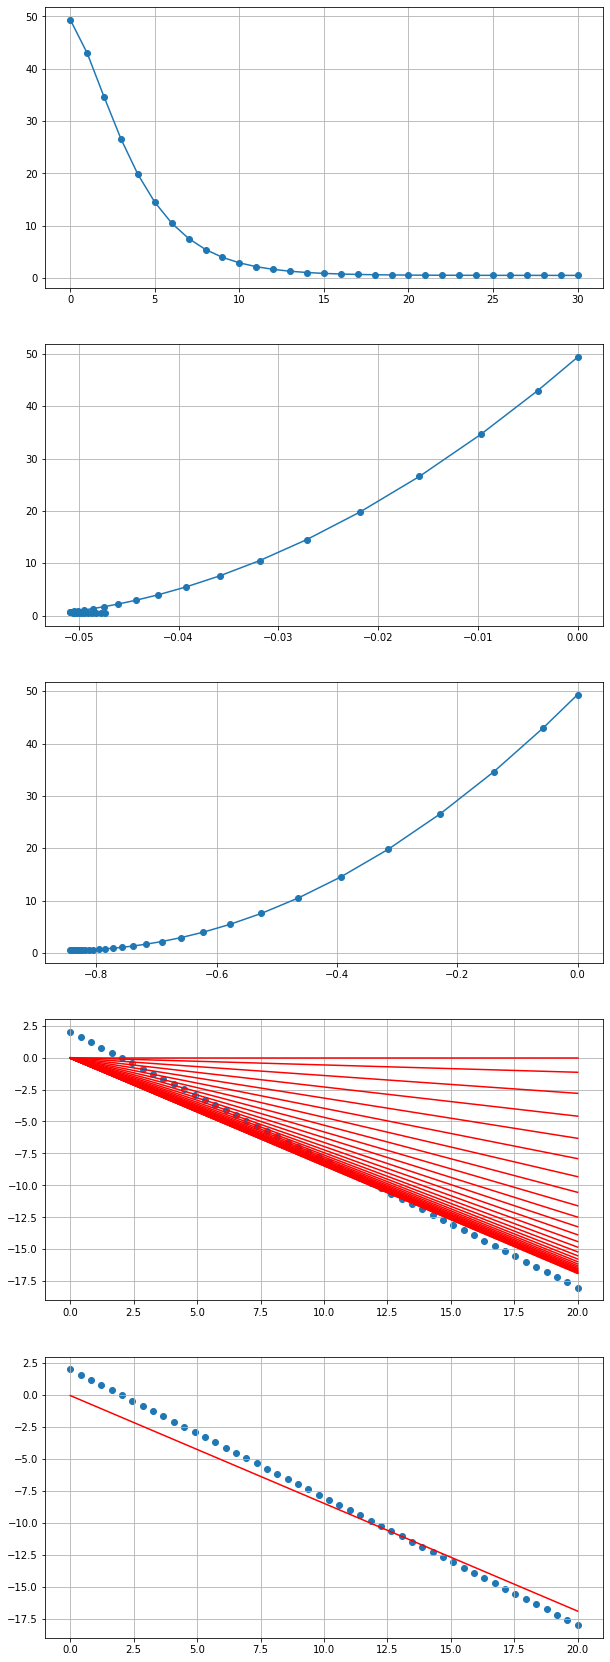

In [11]:
plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [12]:
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = momentum_func(X,y ,0.0005, 0 , 300 )
h = predict(theta0 , theta1 ,X)



 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

v_t_0 : 0.004
v_t_1: 0.05734693877551021
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec nor

0.9686158031920962


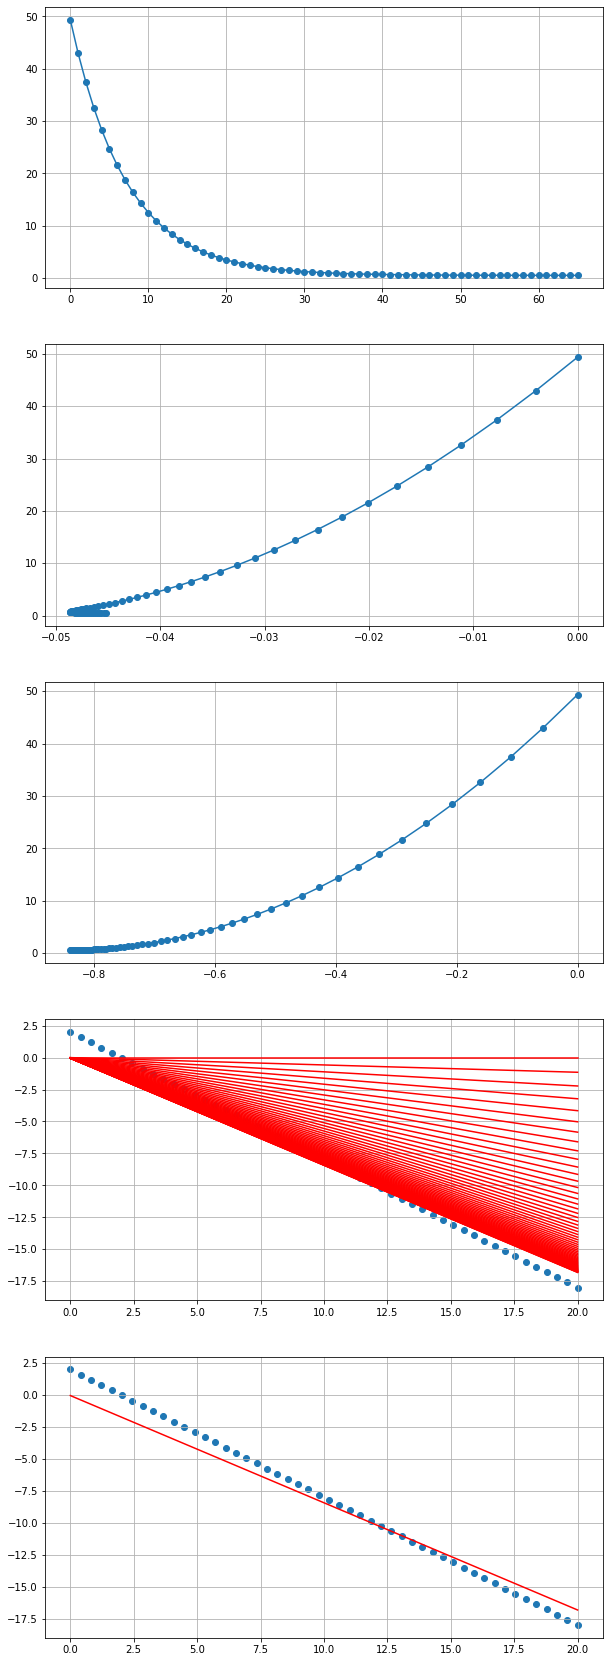

In [13]:
print(r2_score(y,h))
plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)

In [14]:
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = momentum_func(X,y ,0.0005, 0.9 , 300 )
h = predict(theta0 , theta1 ,X)
h

 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

v_t_0 : 0.004
v_t_1: 0.05734693877551021
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec nor

array([[  0.11535974],
       [ -0.23701107],
       [ -0.58938189],
       [ -0.9417527 ],
       [ -1.29412352],
       [ -1.64649433],
       [ -1.99886515],
       [ -2.35123596],
       [ -2.70360678],
       [ -3.05597759],
       [ -3.40834841],
       [ -3.76071922],
       [ -4.11309004],
       [ -4.46546085],
       [ -4.81783167],
       [ -5.17020248],
       [ -5.5225733 ],
       [ -5.87494411],
       [ -6.22731493],
       [ -6.57968574],
       [ -6.93205656],
       [ -7.28442737],
       [ -7.63679819],
       [ -7.989169  ],
       [ -8.34153982],
       [ -8.69391063],
       [ -9.04628145],
       [ -9.39865226],
       [ -9.75102308],
       [-10.1033939 ],
       [-10.45576471],
       [-10.80813553],
       [-11.16050634],
       [-11.51287716],
       [-11.86524797],
       [-12.21761879],
       [-12.5699896 ],
       [-12.92236042],
       [-13.27473123],
       [-13.62710205],
       [-13.97947286],
       [-14.33184368],
       [-14.68421449],
       [-15

##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [15]:
from sklearn.metrics import r2_score
r2_score(y,h)


0.973589591111118

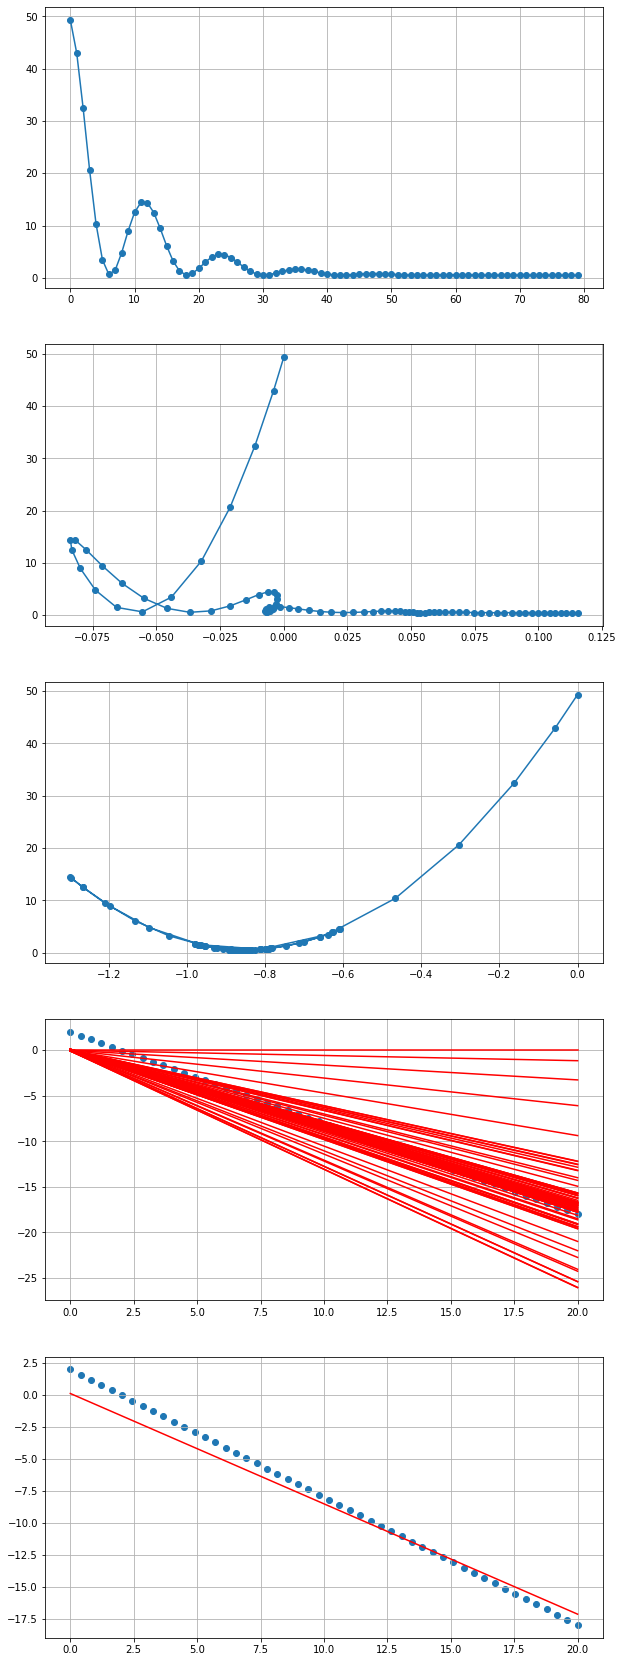

In [16]:
plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [17]:
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = momentum_func(X,y ,0.0005, 0.89 , 300 )
h = predict(theta0 , theta1 ,X)
h

 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

v_t_0 : 0.004
v_t_1: 0.05734693877551021
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec nor

array([[  0.07510911],
       [ -0.27317264],
       [ -0.62145439],
       [ -0.96973613],
       [ -1.31801788],
       [ -1.66629963],
       [ -2.01458137],
       [ -2.36286312],
       [ -2.71114487],
       [ -3.05942662],
       [ -3.40770836],
       [ -3.75599011],
       [ -4.10427186],
       [ -4.4525536 ],
       [ -4.80083535],
       [ -5.1491171 ],
       [ -5.49739885],
       [ -5.84568059],
       [ -6.19396234],
       [ -6.54224409],
       [ -6.89052583],
       [ -7.23880758],
       [ -7.58708933],
       [ -7.93537108],
       [ -8.28365282],
       [ -8.63193457],
       [ -8.98021632],
       [ -9.32849806],
       [ -9.67677981],
       [-10.02506156],
       [-10.37334331],
       [-10.72162505],
       [-11.0699068 ],
       [-11.41818855],
       [-11.76647029],
       [-12.11475204],
       [-12.46303379],
       [-12.81131554],
       [-13.15959728],
       [-13.50787903],
       [-13.85616078],
       [-14.20444252],
       [-14.55272427],
       [-14

0.972435565060376


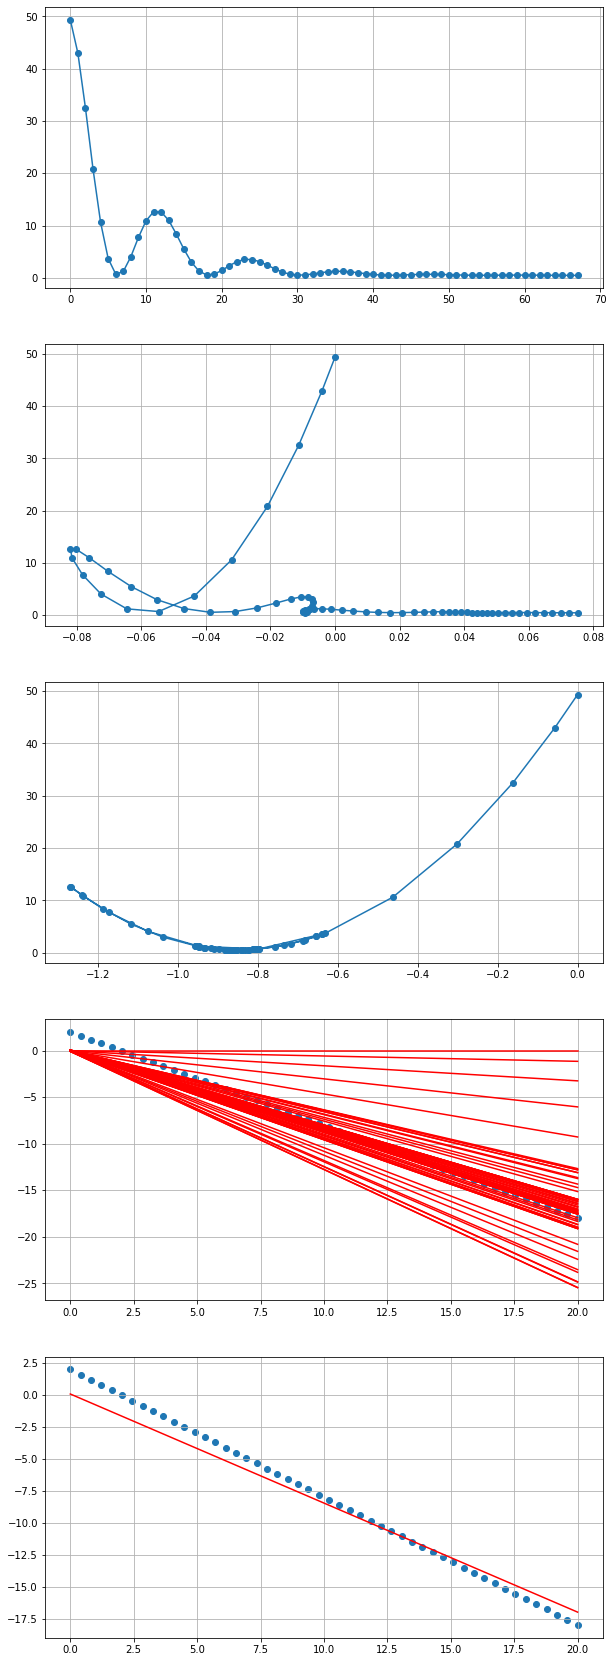

In [18]:
print(r2_score(y,h))
plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)

### Do not forget:

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

##### Very Important:
- <b><font color='red'> In order to calculate the gradient at theta_temp, you will need to calculate the prediction (hypothesis output) using theta_temp. </font></b> 
##### h_temp = theta0_temp + theta1_temp * X 

#### W_temp =W_t - gamma * v(t-1)
#### W(t+1) = W_temp - alpha * grad(W_temp)
#### v_t = gamma * v(t-1) + alpha *grad(W_temp)

In [19]:
def NAG_func(X , y , a , gamma ,iterations):
    theta_0_new1 = 0 
    theta_1_new1=0
    m =len(X)
    costs_hestory=[]
    thetas0 =[]
    thetas1 =[]
    hs = []
    vt0s = [0]
    vt1s= [0]
    thetas_temps0 = []
    thetas_temps1 = []
    v_t_0 = 0 
    v_t_1 = 0
    for i in range(iterations):
        print(f' #################   In the iteration {i} #############################################################')
        h = predict( theta_0_new1 ,theta_1_new1 , X )
        error1 , j1 = calc_error(h , y)
        #W_temp =W_t - gamma * v(t-1)
        
        theta_temp0 = theta_0_new1- gamma*vt0s[i]
        theta_temp1 = theta_1_new1- gamma*vt1s[i]  
        thetas_temps0.append(theta_temp0)
        thetas_temps1.append(theta_temp1)
            
        h_temp = predict(thetas_temps0[i] , thetas_temps1[i] , X)
        d_theta0_temp1 , d_theta1_temp1 , e_vec=calc_d_theta(h=h_temp , m=m , X=X ,y=y)
        
        theta_0_new1 = theta_temp0 - a *d_theta0_temp1
        theta_1_new1 = theta_temp1 - a *d_theta1_temp1
        
        thetas0.append(theta_0_new1)
        thetas1.append(theta_1_new1)
        
        #vt = gamma * v(t-1) + alpha *grad(W_temp)
        v_t_0 = gamma*vt0s[i] +a*d_theta0_temp1
        v_t_1 = gamma*vt1s[i] +a*d_theta1_temp1
        vt0s.append(v_t_0)
        vt1s.append(v_t_1)
        
        costs_hestory.append(j1[0][0])
        if i >0:   
             if abs(costs_hestory[i] -costs_hestory[i-1]) <=0.01:
                break
        print('Error Vec  \n'+str(error1)+'\n')
        print('j = '+str(j1))
        print()
            
        
        
        hs.append(h)
        grad_norm = np.linalg.norm(e_vec)
        print('v_t_0 : '+str(v_t_0))
        print('v_t_1: '+str(v_t_1))
        print('the gradient vec is' +str(e_vec))
        print('the gradient vec norm is' +str(grad_norm))
        if grad_norm<=0.1:
            break
        
        print('theta_0_new : '+str(theta_0_new1))
        print('theta_1_new : '+str(theta_1_new1))
    print('training report is  ')
    print('theta0 optemal '+str(theta_0_new1))
    print('theta1 optemal '+str(theta_1_new1))
    print('#################################################################################')
    return (theta_0_new1 , theta_1_new1 , costs_hestory , thetas0 , thetas1 , hs)
    
    
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = NAG_func(X,y ,0.0005, 0.9 , 300 )
h = predict(theta0 , theta1 ,X)
print('the actual data'+str(y))
print('the predicted '+str(h))

 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

v_t_0 : 0.004
v_t_1: 0.05734693877551021
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec nor

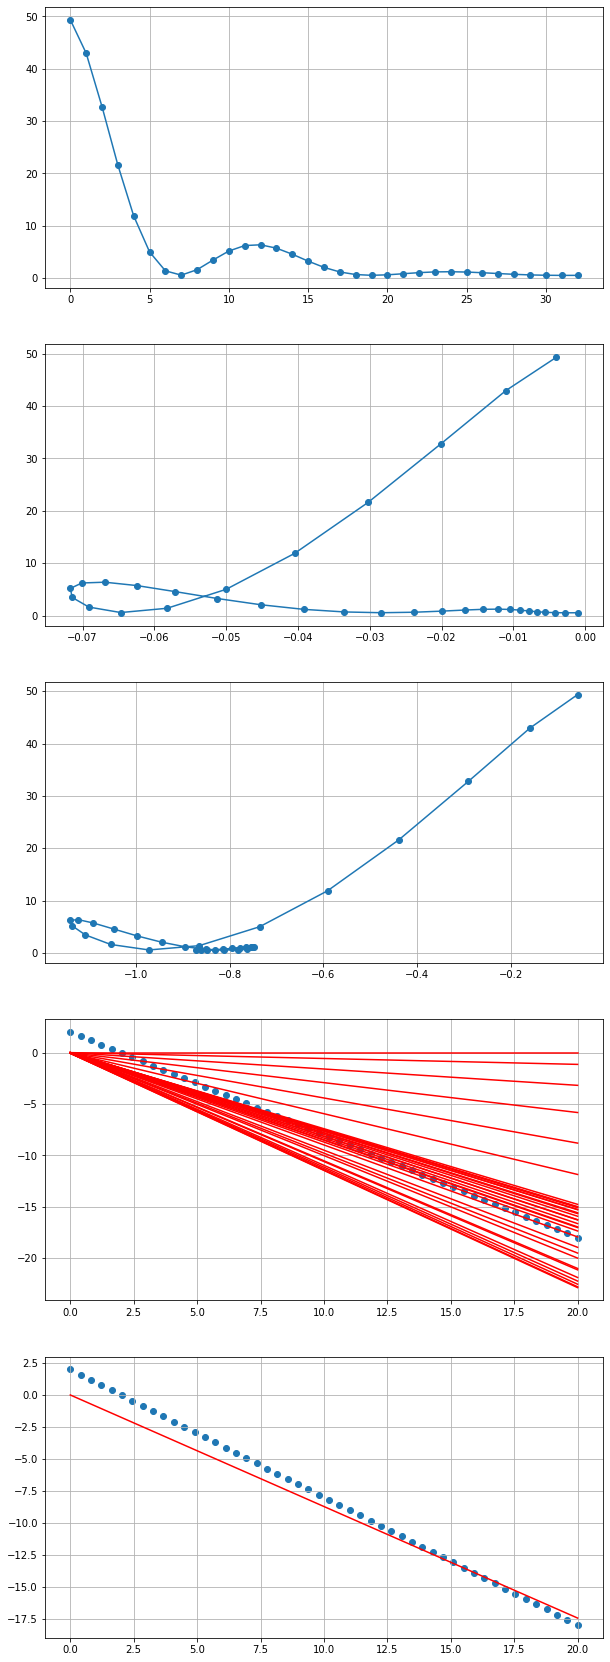

In [20]:
plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)


In [21]:
print(r2_score(y,h))


0.968520578173245


##### The following results uses alpha = 0.0005, gamma=0.9 and max. iterations = 300.

In [22]:
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = NAG_func(X,y ,0.0005, 0.9 , 300 )
h = predict(theta0 , theta1 ,X)
print('the actual data'+str(y))
print('the predicted '+str(h))

 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

v_t_0 : 0.004
v_t_1: 0.05734693877551021
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec nor

****************** Iteration 0 ********************

h(x):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]

Error Vector:
[-2.         -1.59183673 -1.18367347 -0.7755102  -0.36734694  0.04081633
  0.44897959  0.85714286  1.26530612  1.67346939  2.08163265  2.48979592
  2.89795918  3.30612245  3.71428571  4.12244898  4.53061224  4.93877551
  5.34693878  5.75510204  6.16326531  6.57142857  6.97959184  7.3877551
  7.79591837  8.20408163  8.6122449   9.02040816  9.42857143  9.83673469
 10.24489796 10.65306122 11.06122449 11.46938776 11.87755102 12.28571429
 12.69387755 13.10204082 13.51020408 13.91836735 14.32653061 14.73469388
 15.14285714 15.55102041 15.95918367 16.36734694 16.7755102  17.18367347
 17.59183673 18.        ]

j = 49.34693877551021

Gradient Vector:
[[  8.        ]
 [114.69387755]]

Gradient Vector Norm:
114.97254258164628

theta_0_new : -0.004
theta_1_new : -0.05734693

r2_score 0.971103130756324


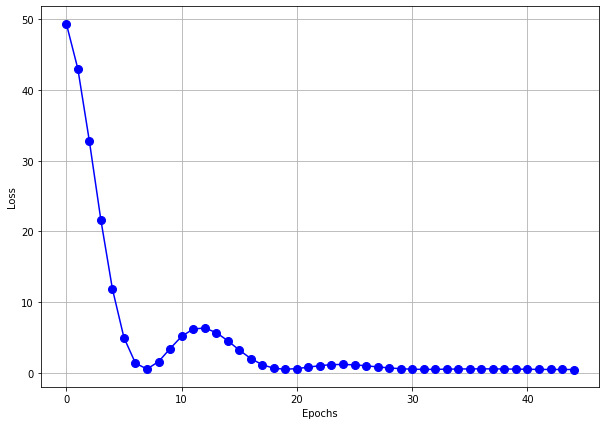

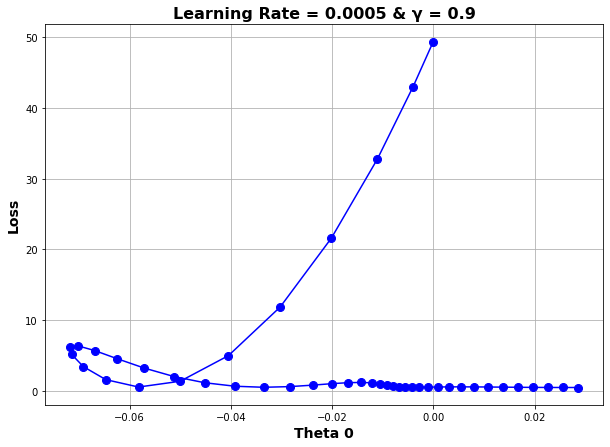

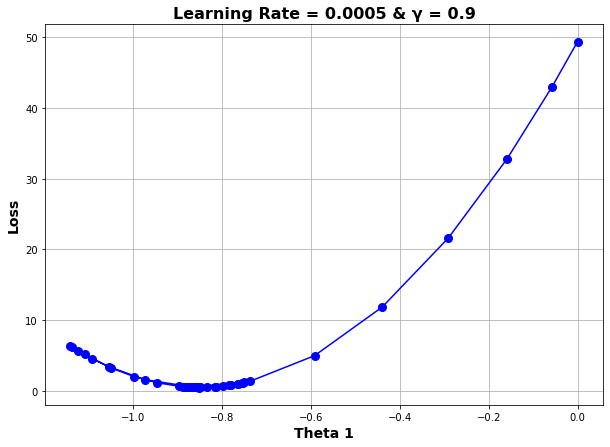

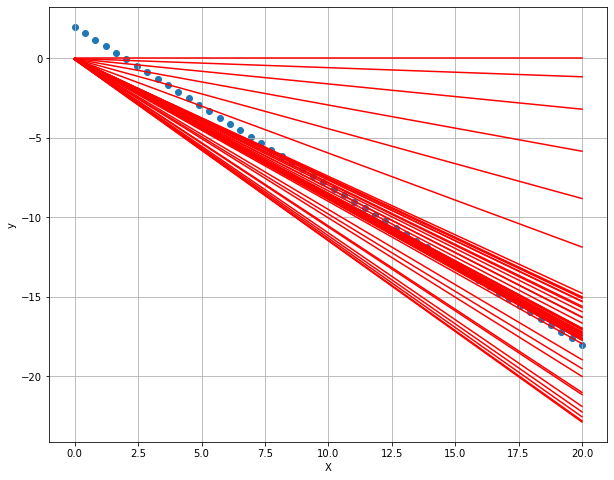

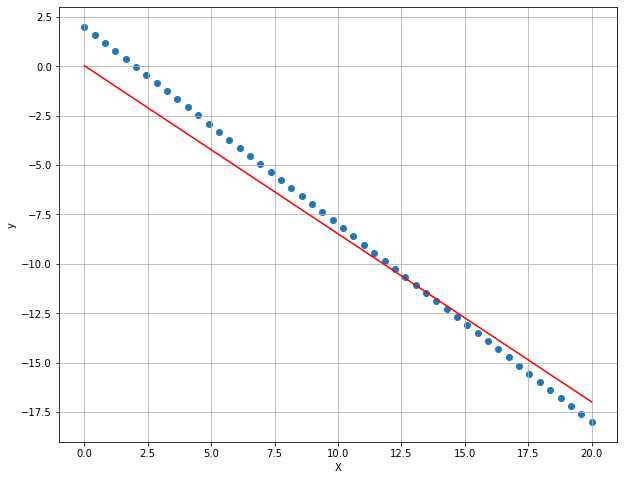

##### The following results uses alpha = 0.0005, gamma=0.89 and max. iterations = 300.

In [243]:
theta0, theta1 , costs_hestory , thetas0 , thetas1 , hs = NAG_func(X,y ,0.0005, 0.89 , 300 )
h = predict(theta0 , theta1 ,X)
print('the actual data'+str(y))
print('the predicted '+str(h))

 #################   In the iteration 0 #############################################################
Error Vec  
[[-2.        ]
 [-1.59183673]
 [-1.18367347]
 [-0.7755102 ]
 [-0.36734694]
 [ 0.04081633]
 [ 0.44897959]
 [ 0.85714286]
 [ 1.26530612]
 [ 1.67346939]
 [ 2.08163265]
 [ 2.48979592]
 [ 2.89795918]
 [ 3.30612245]
 [ 3.71428571]
 [ 4.12244898]
 [ 4.53061224]
 [ 4.93877551]
 [ 5.34693878]
 [ 5.75510204]
 [ 6.16326531]
 [ 6.57142857]
 [ 6.97959184]
 [ 7.3877551 ]
 [ 7.79591837]
 [ 8.20408163]
 [ 8.6122449 ]
 [ 9.02040816]
 [ 9.42857143]
 [ 9.83673469]
 [10.24489796]
 [10.65306122]
 [11.06122449]
 [11.46938776]
 [11.87755102]
 [12.28571429]
 [12.69387755]
 [13.10204082]
 [13.51020408]
 [13.91836735]
 [14.32653061]
 [14.73469388]
 [15.14285714]
 [15.55102041]
 [15.95918367]
 [16.36734694]
 [16.7755102 ]
 [17.18367347]
 [17.59183673]
 [18.        ]]

j = [[49.34693878]]

v_t_0 : 0.004
v_t_1: 0.05734693877551021
the gradient vec is[[  8.        ]
 [114.69387755]]
the gradient vec nor

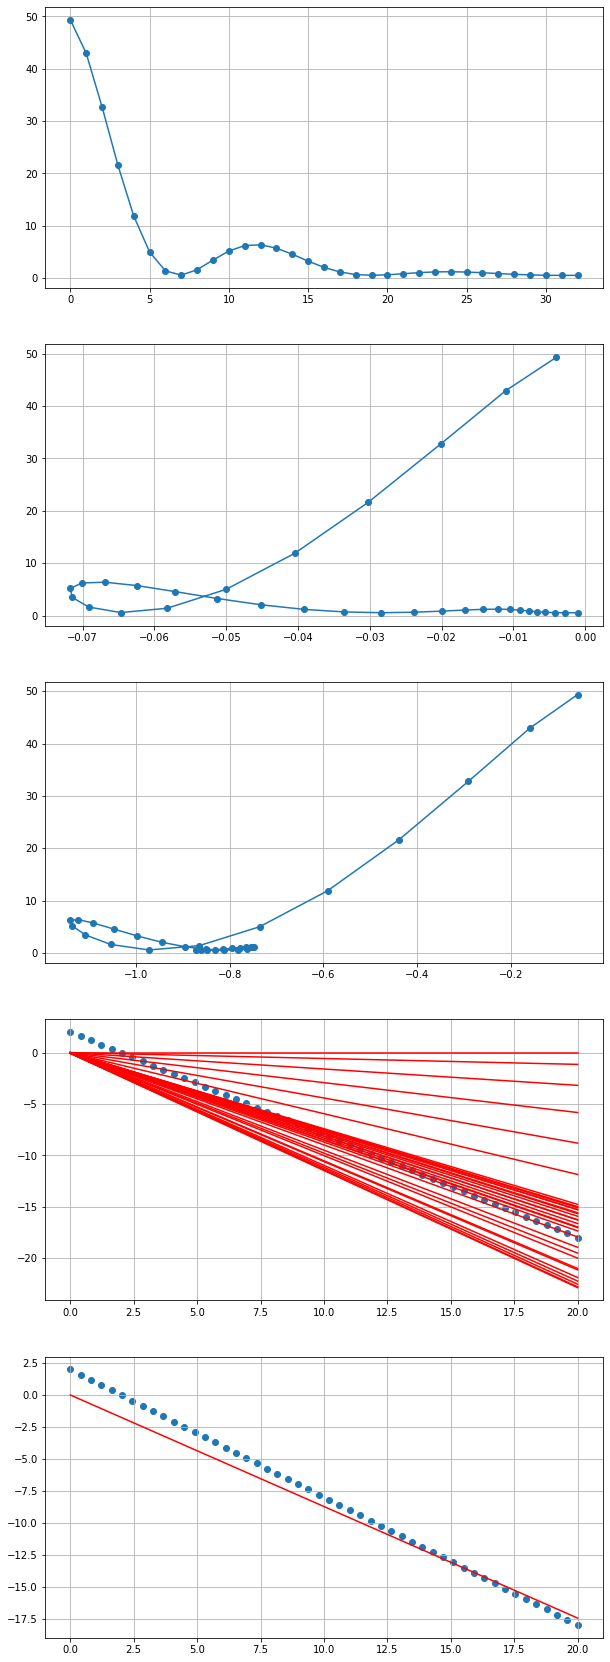

In [294]:

plot_1(X,y, thetas0 , thetas1  ,costs_hestory , hs , h)


In [295]:
print(r2_score(y,h))


0.968520578173245


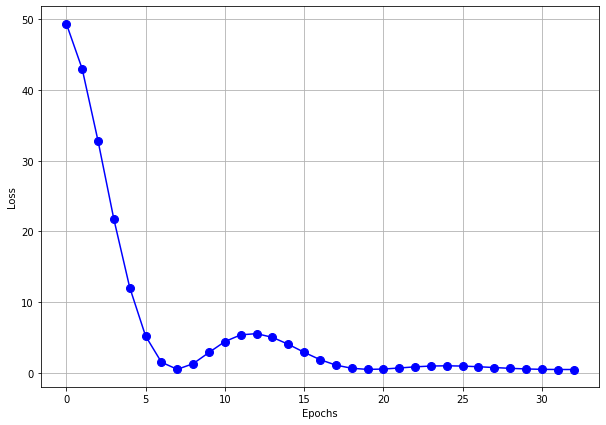

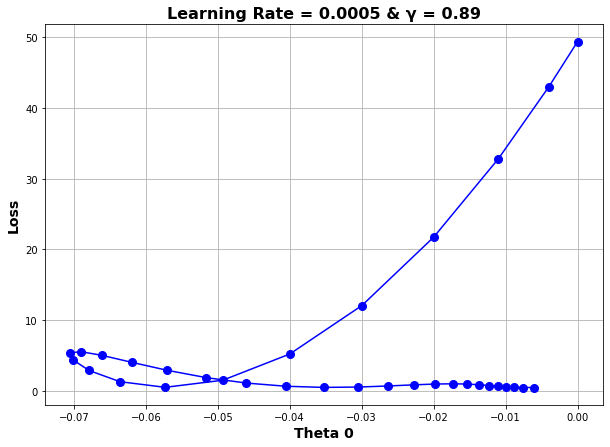

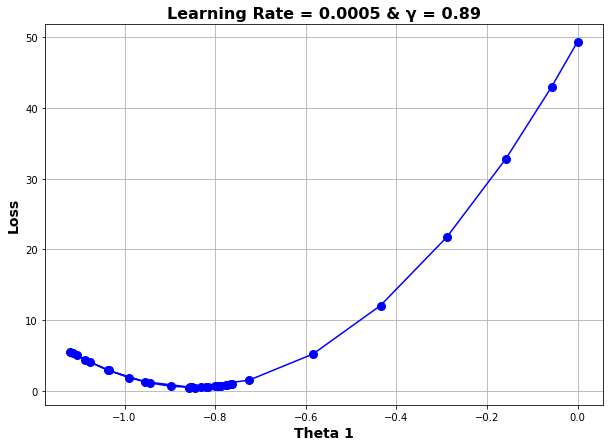

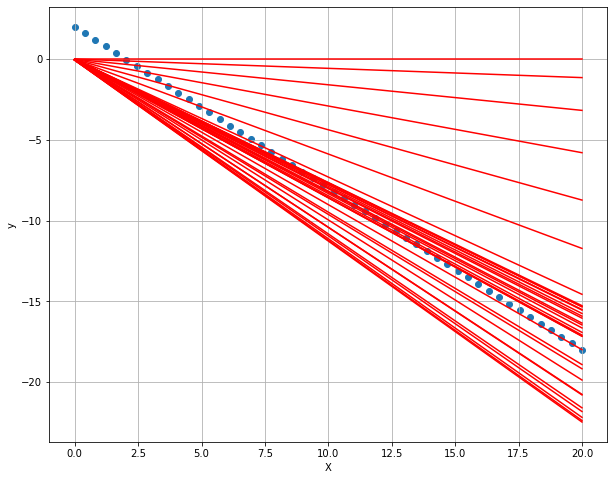

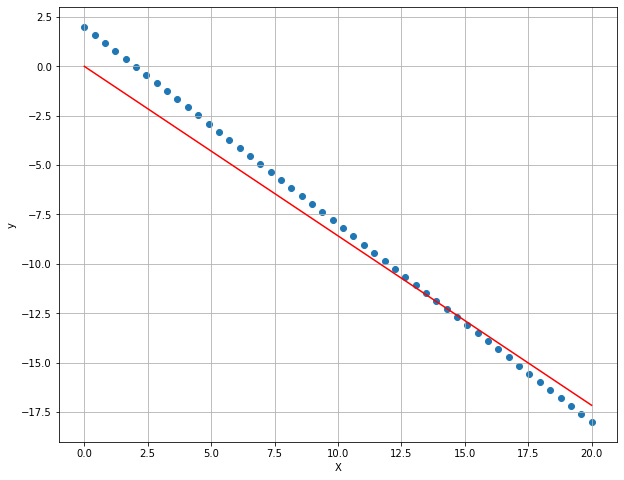